# Project: No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether the patients show up for their appointment or not. A number of characteristics about the patient are included in each row.

  >‘ScheduledDay’ tells us on what day the patient set up their appointment.
   ‘Neighborhood’ indicates the location of the hospital.
   ‘Scholarship’ indicates whether the patient is enrolled in Brasilian welfare program Bolsa Família or not.

>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [2]:
 #importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns




<a id='wrangling'></a>
## Data Wrangling

### In this section of the report, the data was cleaned, missing values were filled, sorted and cleaned for the analysis

### 1.) General Properties

In [3]:
#read the data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#read the data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### The next line of code will give a brief description of each column and some statistical description of the column

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### 2.) Data Cleaning

In [7]:
#checking for datatype
df['AppointmentDay'].dtype


dtype('O')

In [8]:
#changing appointmentday to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
df['AppointmentDay'].dtype

datetime64[ns, UTC]

In [10]:
#changing to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [11]:
#dropping some columns not needed
df.drop(['PatientId', 'AppointmentID'], axis =1, inplace=True)

In [12]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#correcting the spelling of Hipertension
df.rename(columns= {'Hipertension': 'Hypertension'},inplace = True)

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#correcting the spelling of No-show
df.rename(columns= {'No-show': 'No_show'}, inplace = True)

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#renaming columns
df.rename(columns= {'ScheduledDay': 'ScheduledDate', 'AppointmentDay': 'AppointmentDate'}, inplace = True)

df.head()

,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.drop(index=df[df['Age'] == -1].index, inplace=True)
#dropping the row with the -1 age

In [17]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Wrangling steps taken include:
1.) Changing the date in the data to datetime, as this will make the data consistent and make the code run smoothly.
2.) Dropping the PatientID and AppointmentID columns as they I would not be using them for any exploratory analysis.
3.) Correcting the spelling of Hypertension
4.) Renaming appointmentday to appointmentdate and also of scheduleday to scheduledate
5.) Renaming No-show to No_show.
6.)Dropping the role that contains the age -1, as this will affect our analysis.

<a id='eda'></a>
## Exploratory Data Analysis



## Research Question 1 
 ## What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

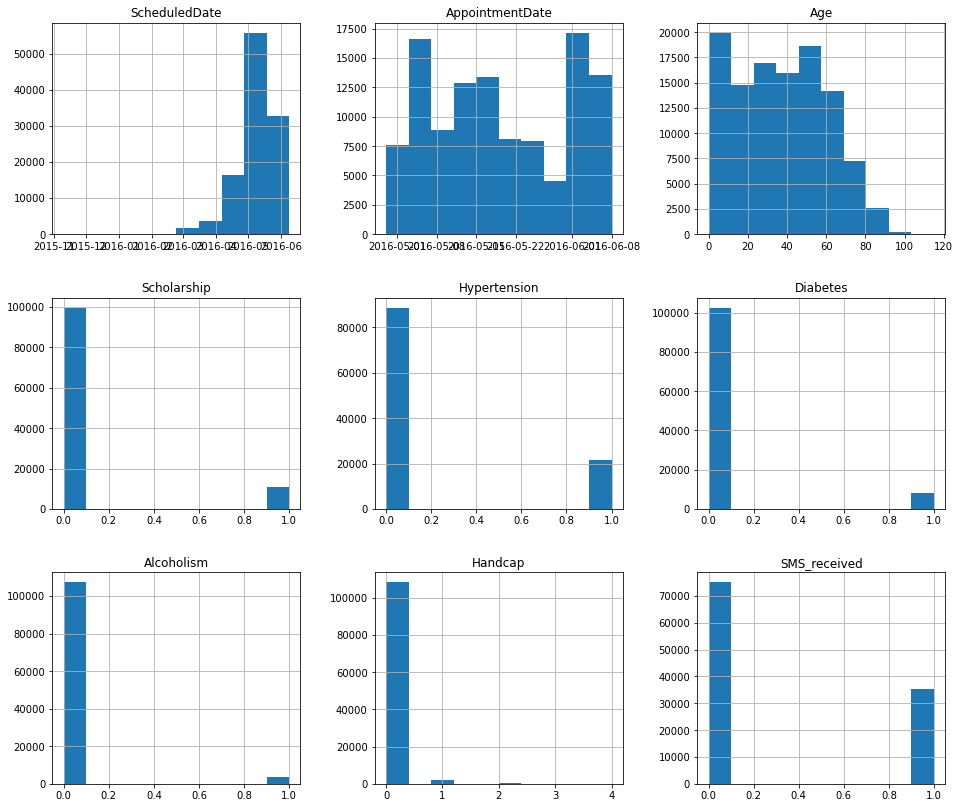

In [18]:
#A look into the whole data
df.hist(figsize = (16,14));

In [19]:
df.corr().round(3)

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000,-0.092,0.505,0.292,0.096,0.078,0.013
Scholarship,-0.092,1.000,-0.020,-0.025,0.035,-0.009,0.001
Hypertension,0.505,-0.020,1.000,0.433,0.088,0.080,-0.006
Diabetes,0.292,-0.025,0.433,1.000,0.018,0.058,-0.015
Alcoholism,0.096,0.035,0.088,0.018,1.000,0.005,-0.026
Handcap,0.078,-0.009,0.080,0.058,0.005,1.000,-0.024
SMS_received,0.013,0.001,-0.006,-0.015,-0.026,-0.024,1.000


In [21]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192
Hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000


### The correlation coefficients along the diagonal of the table are all equal to 1 because each variable is perfectly correlated with itself. All of the other correlation coefficients indicate the correlation between different pairwise combinations of variables. For example: age and scholarship is -0.092463, Age and hypertension is 0.504586



In [22]:
# categorizing no_show column
Show = df.No_show == 'No'
NoShow = df.No_show == 'Yes'

In [23]:
df[Show].count()

Gender             88207
ScheduledDate      88207
AppointmentDate    88207
Age                88207
Neighbourhood      88207
Scholarship        88207
Hypertension       88207
Diabetes           88207
Alcoholism         88207
Handcap            88207
SMS_received       88207
No_show            88207
dtype: int64

In [24]:
df[NoShow].count()

Gender             22319
ScheduledDate      22319
AppointmentDate    22319
Age                22319
Neighbourhood      22319
Scholarship        22319
Hypertension       22319
Diabetes           22319
Alcoholism         22319
Handcap            22319
SMS_received       22319
No_show            22319
dtype: int64

### From the count analysis shown above, the number of people who showed is about 4times of those that didnt show.

### Research Question 2  

#### Comparing Other Factors

<AxesSubplot:xlabel='Gender', ylabel='count'>

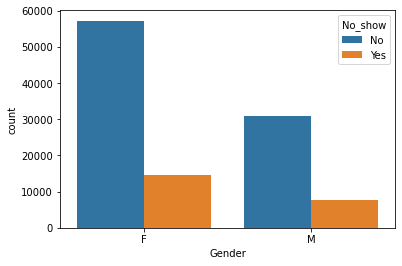

In [25]:
sns.countplot(x = 'Gender', hue = 'No_show', data = df)

## From the above analysis, it shows that the female gender has a large number of Noshow and Show, so it can be concluded that the gender does not have much significance.

In [26]:
df.Scholarship.unique()

array([0, 1], dtype=int64)

In [27]:
df.groupby(['Scholarship', 'No_show'], as_index=False).agg(total_count=('No_show','count'))



,Scholarship,No_show,total_count
0,0,No,79924
1,0,Yes,19741
2,1,No,8283
3,1,Yes,2578


<AxesSubplot:xlabel='Scholarship', ylabel='count'>

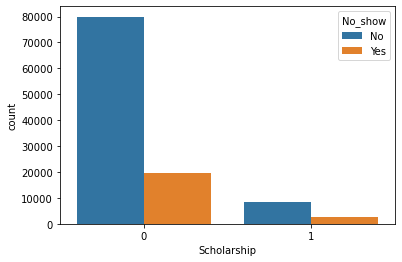

In [28]:
sns.countplot(x = 'Scholarship', hue = 'No_show', data = df)

### From the above analysis, it shows that enrollment in the Brasilian welfare program have little significance as high number of people that are not on the scholarship showed up for their appointment

<AxesSubplot:xlabel='Hypertension', ylabel='count'>

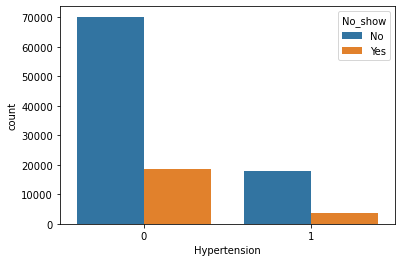

In [29]:
sns.countplot(x = 'Hypertension', hue = 'No_show', data = df)

### The graph shows that hypertensive patients showed up for their appointment and non-hypertensive patients also showed up, so it can be deduced that been hypertensive doesn't affect showing up or not.

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

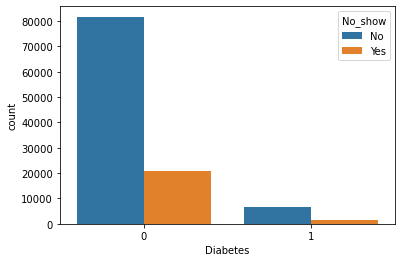

In [30]:
sns.countplot(x = 'Diabetes', hue = 'No_show', data = df)

### From the analysis of the diabetes data frame, it shows that patients that are diabetic showup for their appointment more than those that are not diabetic. So it can be implied that diabetes does not affect whether patients showup or not.

<AxesSubplot:xlabel='Handcap', ylabel='count'>

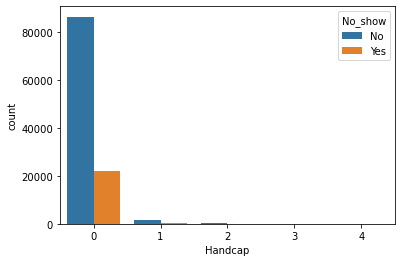

In [31]:
sns.countplot(x = 'Handcap', hue = 'No_show', data = df)

### The above graph clearly shows that been handcap does not affect show or no-show, as patients who are handcap show up .

<AxesSubplot:xlabel='SMS_received', ylabel='count'>

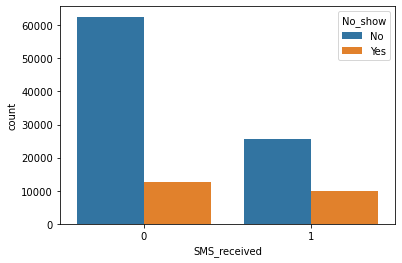

In [32]:
sns.countplot(x = 'SMS_received', hue = 'No_show', data = df)

### From the above analysis, patients who did not receive SMS still showed for their appointment more than those who received analysis. IMPRESSIVE!!!

In [33]:
#age categorization
def age_classes(x):
    if x<10:
        return "0-9"
    elif x<20:
        return "10-19"
    elif x<30:
        return "20-29"
    elif x<40:
        return "30-39"
    elif x<50:
        return "40-49"
    elif x<60:
        return "50-59"
    elif x<70:
        return "60-69"
    elif x<80:
        return "70-79"
    elif x<90:
        return "80-89"
    elif x<100:
        return "90-99"
    else:
        return "100+"

df["age_group"] = df.Age.map(age_classes)
df.head()

,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-69
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-59
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-69
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-9
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-59


<AxesSubplot:xlabel='age_group', ylabel='count'>

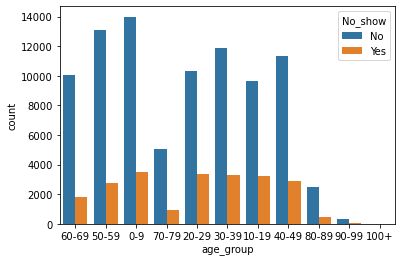

In [34]:
sns.countplot(x = 'age_group', hue = 'No_show', data = df)

### The graph shows that patients in the age group of 0-9 show up more, follow by ages 50-59.

<a id='conclusions'></a>
## Conclusions

#### From my analysis of the no-show datasets, i discovered that
1) Age has a significant role to play in whether patients showup or not. Patients between the ages 0-9, follow by ages 50-59 and the older they get the less likely they are to showup.
2) Patients that did not receive sms notification, show up for their appointment.
3.) Enrollment in the Brasilian Welfare program have little significance in patients showing up or not for their appointment.


### Limitation
1.) I could not find any relationship in patients showing up or not in the scholarship, hypertension, diabetes, handcap, gender data.
2.) I couldn't show much correlation between the factors beacause I was working with categorized data
3.) Handcap people showed up for their appointment as well as non-handcap patient, I could not find correlation between the two factors.

